# Optimizing eBay Sales with Predictive Analytics: 
###  Analysing Trends and Forecasting Future Performance!

![image.png]()

# 1. Business Understanding

### Overview

eBay is an eCommerce platform that operates as an online marketplace where individuals and businesses can buy and sell a wide variety of products, including electronics, fashion, collectibles, home goods, and more.

**Stakeholders**
The primary stakeholders in this project include:
- Executive Leadership (eBay C-Suite): They require accurate sales forecasts to make informed decisions about resource allocation and market positioning.
- Inventory Management Team: They need accurate predictions to avoid stockouts or overstocks, which can lead to lost sales or excess inventory costs.
- Marketing Team:  They need to understand sales trends to time campaigns effectively and allocate budget to the most promising opportunities.
- Finance Department: Accurate sales forecasts are critical for their planning processes, ensuring that revenue projections align with actual business performance.
- Investors: They rely on accurate sales predictions to gauge the company's future performance, which influences their investment decisions and perceptions of eBay's market value.

### Problem Statement
In the highly competitive eCommerce landscape, accurately predicting sales is crucial for optimizing inventory management, marketing strategies, and overall business performance. eBay, as a major online marketplace, experiences significant fluctuations in sales due to various factors including seasonal trends, promotional activities, market demand, and external economic conditions.
> **The challenge** fluctuations in sales due to various factors including seasonal trends, promotional activities, market demand, and external economic conditions. This leads to poor decision-making, Inefficient resource allocation, and poor financial planning.

### Objectives 
**Main objective**: To create a model that predicts eBay sales accurately. This will help with better inventory management, marketing, and financial planning by using past sales data and other factors to make informed business decisions.

**Specific Objectives**: 
- Develop a predictive model capable of forecasting eBay sales with a high degree of accuracy on a weekly or monthly basis.
- Demonstrate the practical application of the predictive model in optimizing inventory management by reducing stockouts and overstocks. 
- Identify opportunities for targeted marketing campaigns based on predicted sales trends.

### Success Metric

Evaluate the performance of the predictive model using appropriate metrics, that is: Mean Absolute Error (MAE), Mean Squared Error (MSE) and the Root Mean Squared Error (RMSE). We will select the model with the lowest MAE,MSE and RMSE.

### Conclusion

By developing and implementing a robust predictive model, eBay can significantly enhance its ability to forecast sales, optimize inventory management, and make data-driven marketing decisions.

# 2. Data Understanding

**Data Collection**
Source: Yahoo Finance via yfinance API.

**Data Components**

**Historical Stock Prices:** Includes Open, High, Low, Close prices, and Volume of trades.These key features provide a snapshot of a stock's performance on any given trading day:
- Open: It is the first price at which a transaction is made in that stock during the day.
- High: The highest price at which the stock traded during the day. 
- Low: The lowest price at which the stock traded during the day. 
- Close: The final price at which the stock traded when the market closed. 
- Volume: The total number of shares traded during the day. 

**Additional Features:** Adjusted Close prices for accounting for corporate actions like stock splits and dividends.
The Adjusted Close price adjusts the closing price to reflect the impact of corporate actions like dividends, stock splits, and new stock issuance. This feature is essential for long-term analysis because it provides a more accurate picture of a stock’s value over time.
- Dividends: When a company pays out dividends to its shareholders, the stock price typically drops by the dividend amount. The Adjusted Close accounts for this, ensuring that historical price data remains consistent and comparable.
- Stock Splits: In a stock split, a company increases the number of its shares without changing the market value of the company. For instance, in a 2-for-1 split, the stock price is halved, but the number of shares doubles. The Adjusted Close adjusts for this, so the price before and after the split can be compared directly.

In [1]:
#Uncomment the line below only if you have not installed yfinance in your current env

# !pip install yfinance
# !pip install prophet

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
import yfinance as yf
from prophet import Prophet
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
# Define the ticker symbol for eBay
ticker_symbol = 'EBAY'

# Fetch historical market data for eBay
ebay_data = yf.Ticker(ticker_symbol)

# Get historical data (you can specify the period and interval)
historical_data = ebay_data.history(period='max', interval='1d')

# Save the historical data to a CSV file
historical_data.to_csv('ebay_historical_data.csv')

#print the first few rows to confirm
historical_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1998-09-24 00:00:00-04:00,0.855242,0.867232,0.707373,0.757329,518656090,0.0,0.0
1998-09-25 00:00:00-04:00,0.727356,0.737347,0.657418,0.717364,121255834,0.0,0.0
1998-09-28 00:00:00-04:00,0.759328,0.813279,0.735349,0.771317,89772883,0.0,0.0
1998-09-29 00:00:00-04:00,0.789300,0.803288,0.763324,0.781308,39289536,0.0,0.0
1998-09-30 00:00:00-04:00,0.754331,0.767320,0.691388,0.720361,44113766,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-07 00:00:00-04:00,56.279999,56.779999,55.049999,55.110001,4871300,0.0,0.0
2024-08-08 00:00:00-04:00,55.509998,56.000000,55.150002,55.939999,2640200,0.0,0.0
2024-08-09 00:00:00-04:00,56.000000,56.740002,55.860001,56.520000,2952200,0.0,0.0


In [4]:
# Load the data
data = pd.read_csv('ebay_historical_data.csv')

In [5]:
# check dataset structure
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1998-09-24 00:00:00-04:00,0.855242,0.867232,0.707373,0.757329,518656090,0.0,0.0
1,1998-09-25 00:00:00-04:00,0.727356,0.737347,0.657418,0.717364,121255834,0.0,0.0
2,1998-09-28 00:00:00-04:00,0.759328,0.813279,0.735349,0.771317,89772883,0.0,0.0
3,1998-09-29 00:00:00-04:00,0.789300,0.803288,0.763324,0.781308,39289536,0.0,0.0
4,1998-09-30 00:00:00-04:00,0.754331,0.767320,0.691388,0.720361,44113766,0.0,0.0


In [6]:
data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
6508,2024-08-07 00:00:00-04:00,56.279999,56.779999,55.049999,55.110001,4871300,0.0,0.0
6509,2024-08-08 00:00:00-04:00,55.509998,56.000000,55.150002,55.939999,2640200,0.0,0.0
6510,2024-08-09 00:00:00-04:00,56.000000,56.740002,55.860001,56.520000,2952200,0.0,0.0
6511,2024-08-12 00:00:00-04:00,56.750000,57.180000,55.500000,55.810001,4194100,0.0,0.0
6512,2024-08-13 00:00:00-04:00,56.130001,56.400002,55.250000,55.700001,4889100,0.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6513 non-null   object 
 1   Open          6513 non-null   float64
 2   High          6513 non-null   float64
 3   Low           6513 non-null   float64
 4   Close         6513 non-null   float64
 5   Volume        6513 non-null   int64  
 6   Dividends     6513 non-null   float64
 7   Stock Splits  6513 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 407.2+ KB


In [8]:
data.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [9]:
# Display basic statistics of the dataset

data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6513.000000,6513.000000,6513.000000,6513.000000,6.513000e+03,6513.000000,6513.000000
mean,21.548012,21.839451,21.270205,21.555129,3.273501e+07,0.000666,0.001747
std,15.740216,15.919548,15.577297,15.745355,3.350545e+07,0.011736,0.063943
min,0.445605,0.467586,0.403642,0.463589,2.129200e+06,0.000000,0.000000
25%,9.361308,9.507098,9.192496,9.349798,9.875800e+06,0.000000,0.000000
50%,16.075355,16.313233,15.849001,16.088785,2.585991e+07,0.000000,0.000000
75%,31.877825,32.196878,31.558780,31.850487,4.350005e+07,0.000000,0.000000
max,76.652449,76.860714,75.639509,76.292702,5.776987e+08,0.270000,3.000000


__Overview__

- The dataset contains columns such as Date, Open, High, Low, Close, Volume, Dividends, and Stock Splits.
- 
The data spans from 1998 and includes daily stock prices and volumes
- 
The Dividends and Stock Splits columns mostly contain zeros, indicating that these events are rare.

# 3. Data Preparation

We'll move on to the Data Preparation step, where we'll clean and prepare the data for modeling.

This will include:
- handling missing values
- feature engineering
- and splitting the data into training and testing sets.

Let's proceed with that.

In [10]:
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
 data = data.set_index('Date')

Then, we will set the date as the index so as to allow easier time-based operations as well as manipulations of the data.

This step also ensures that feature engineering, and modeling efforts are more streamlined and effective.

In [12]:
# Check for missing values

data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [13]:
# Check for duplicates
duplicate_rows = data[data.duplicated()]

# Count the number of duplicate rows
num_duplicates = len(duplicate_rows)

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


We are then going to drop columns that are not needed for modeling

Assuming 'Dividends' and 'Stock Splits' are not needed due to their low variance

In [14]:
data = data.drop(['Dividends', 'Stock Splits'], axis=1)

data.head()

,Open,High,Low,Close,Volume
Date,,,,,
1998-09-24 00:00:00-04:00,0.855242,0.867232,0.707373,0.757329,518656090
1998-09-25 00:00:00-04:00,0.727356,0.737347,0.657418,0.717364,121255834
1998-09-28 00:00:00-04:00,0.759328,0.813279,0.735349,0.771317,89772883
1998-09-29 00:00:00-04:00,0.789300,0.803288,0.763324,0.781308,39289536
1998-09-30 00:00:00-04:00,0.754331,0.767320,0.691388,0.720361,44113766


## Feature Engineering

Let's create a 'Year' and 'Month' column from the 'Date'

In [15]:
# Initialize data_reset if needed
data_reset = data.reset_index()

# Convert to UTC to ensure consistency in datetime format
data_reset['Date'] = pd.to_datetime(data_reset['Date'], utc=True)

# Remove timezone information
data_reset['Date'] = data_reset['Date'].dt.tz_localize(None)

# Feature engineering
data_reset['Year'] = data_reset['Date'].dt.year
data_reset['Month'] = data_reset['Date'].dt.month

# Set 'Date' back as the index if needed
data = data_reset.set_index('Date')





In [16]:
# Create lag features
data['Lag1'] = data['Close'].shift(1)
data['Lag2'] = data['Close'].shift(2)
data['RollingMean_30'] = data['Close'].rolling(window=30).mean()
data['RollingStd_30'] = data['Close'].rolling(window=30).std()
data = data.dropna()  # Drop rows with NaN values

In [17]:
data.head()

,Open,High,Low,Close,Volume,Year,Month,Lag1,Lag2,RollingMean_30,RollingStd_30
Date,,,,,,,,,,,
1998-11-04 05:00:00,1.366790,1.370786,1.305843,1.321829,44632685,1998,11,1.342810,1.342810,0.815677,0.316382
1998-11-05 05:00:00,1.294853,1.338814,1.258884,1.297851,66085114,1998,11,1.321829,1.342810,0.833695,0.328118
1998-11-06 05:00:00,1.284861,1.349804,1.282863,1.342810,48966509,1998,11,1.297851,1.321829,0.854543,0.340122
1998-11-09 05:00:00,1.352801,1.646541,1.350803,1.646541,202355366,1998,11,1.342810,1.297851,0.883717,0.369044
1998-11-10 05:00:00,1.801404,2.238017,1.776426,2.092145,577698739,1998,11,1.646541,1.342810,0.927412,0.429199


With these features, you can now use them as inputs to train a predictive model. These lag features and rolling statistics can help the model understand trends, momentum, and volatility in the data, which are often crucial in time series forecasting tasks, such as predicting future closing prices.

## Visualization

Let's create a visualizaton of the historical closing prices over time prices

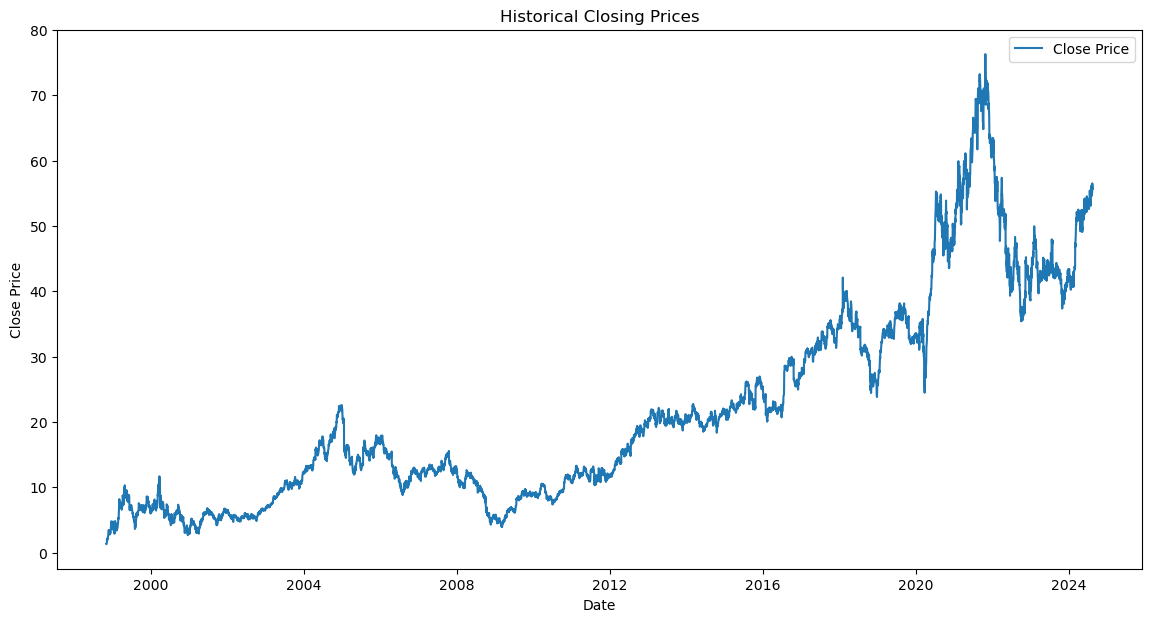

In [18]:
# Plot the closing prices over time
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.title('Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Let's further analyze the data by calculating the moving average to smooth out the price trends.

We will calculate a 30-day moving average and plot it alongside the closing prices.

The 30-day moving average line provides a more stable view of the market trend, reducing the noise from daily price changes. It can be used to identify potential support and resistance levels, as well as to signal potential trend reversals.

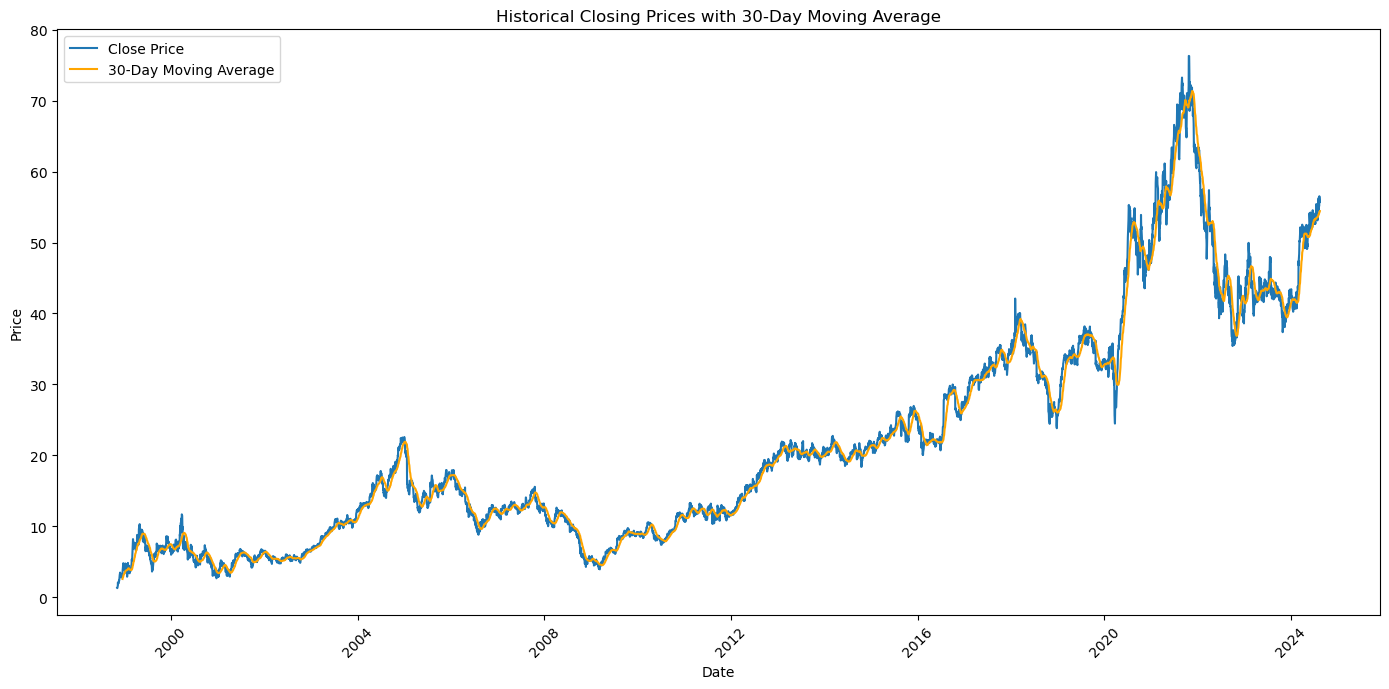

In [19]:
# Calculate the 30-day moving average
moving_average_30 = data['Close'].rolling(window=30).mean()

# Plot the closing prices and the 30-day moving average
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, moving_average_30, label='30-Day Moving Average', color='orange')
plt.title('Historical Closing Prices with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

__Overview__

The closing prices exhibit volatility, with noticeable peaks and troughs. This suggests that the market has experienced periods of rapid change, which could be due to various economic factors or events.

Let us now check for trend and seasonality in our data.

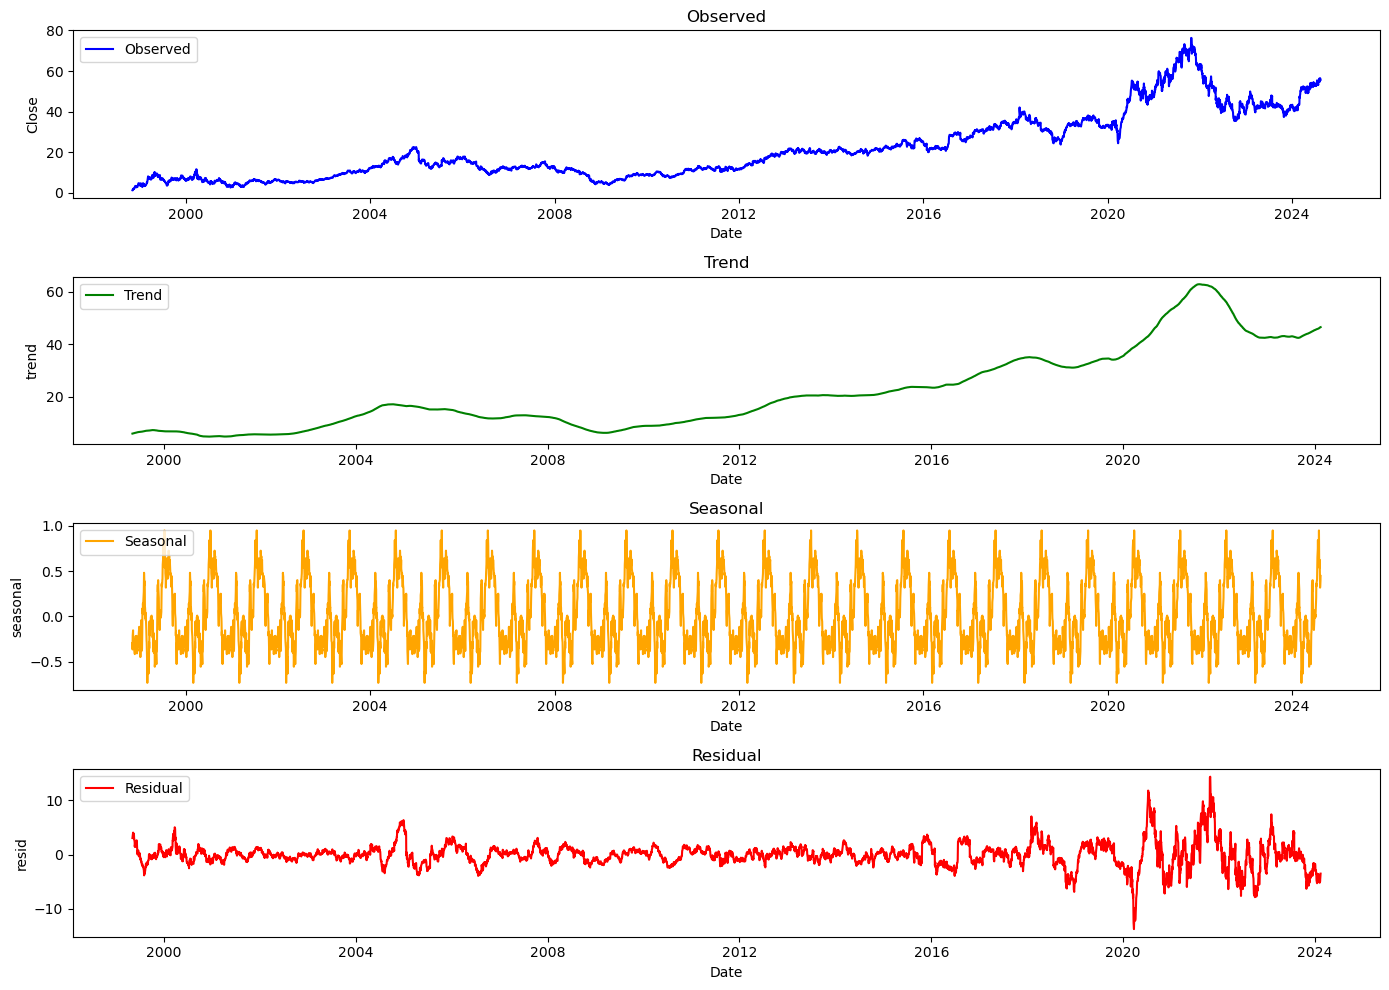

In [20]:
decomposition = seasonal_decompose(data['Close'], model='additive', period=252)  # 252 trading days in a year

# Plot the decomposed components
plt.figure(figsize=(14, 10))

# Observed
plt.subplot(411)
sns.lineplot(data=decomposition.observed, color='blue', label='Observed')
plt.legend(loc='upper left')
plt.title('Observed')

# Trend
plt.subplot(412)
sns.lineplot(data=decomposition.trend, color='green', label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')

# Seasonal
plt.subplot(413)
sns.lineplot(data=decomposition.seasonal, color='orange', label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal')

# Residual
plt.subplot(414)
sns.lineplot(data=decomposition.resid, color='red', label='Residual')
plt.legend(loc='upper left')
plt.title('Residual')

plt.tight_layout()
plt.show()

1. Original Time Series: It shows that the overall movement of the stock closing prices over time has an upward movement.
2. Trend Component:the trend is upward,indicating a general increase in stock closing prices over the period.
3. Seasonal Component:seasonality component has spikes, it indicates that the data exhibit strong or regular seasonal patterns. In other words, there are a consistent, repeating fluctuations that occur at the same intervals.
>The seasonal component captures repeating patterns or cycles within specific intervals, typically within a year. This plot reveals consistent seasonal fluctuations in the closing prices, with peaks and troughs recurring annually.

4. Residual Component:
>The residual component is what remains after removing the trend and seasonal effects from the observed data. It captures the irregular or random fluctuations in the data that are not explained by the trend or seasonality. The residuals appear to show increased volatility around 2020, possibly due to unexpected market events.

**Check Stationarity:**

Use the Augmented Dickey-Fuller (ADF) test to check if the data is stationary. ARIMA requires the data to be stationary, meaning the statistical properties like mean and variance do not change over time.

In [21]:
result = adfuller(data['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -0.495094
p-value: 0.892970


Non-Stationarity: The p-value is quite high ( 0.892970), well above the common thresholds of 0.05 or 0.10, meaning there is not enough evidence to reject the null hypothesis. This indicates that the time series is likely non-stationary.
ADF Statistic: The ADF statistic being close to zero also supports the conclusion that the series is non-stationary.

**What This Means for our Model**:
Using non-stationary data to build a model can produce misleading results. Therefore, transforming the data to achieve stationarity is crucial for accurate forecasting.

In [22]:
data['Close_diff'] = data['Close'].diff().dropna()

# Re-run the ADF test on the differenced data
result_diff = adfuller(data['Close_diff'].dropna())
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])


ADF Statistic: -15.533246
p-value: 0.000000


ADF Statistic: A very negative value of -15.533247, strongly suggests that the null hypothesis of non-stationarity can be rejected.
p-value: A p-value of 0.000000 is below the common significance level of 0.05, indicating strong evidence against the null hypothesis.

**Conclusion**

These results indicate that your differenced data is stationary.

Since stationarity has been achieved, meaning it no longer has a unit root and its statistical properties do not change over time, we can now proceed with fitting an ARIMA model to your data.

# Modelling

We will be using three models to train our data. That is :

- ARIMA model 
- Prophet model 
- SARIMA model

In [23]:
# Split the data into training and testing sets
# Assume 80% of the data is for training and 20% is for testing
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]


1. Determine the ARIMA Parameters (p, d, q):
>p (AutoRegressive term): Determine the number of lag observations included.
d (Differencing term): You’ve already applied differencing, so d=1 in this case.
q (Moving Average term): Determine the size of the moving average window.

We use ACF and PACF plots to help choose the parameters.

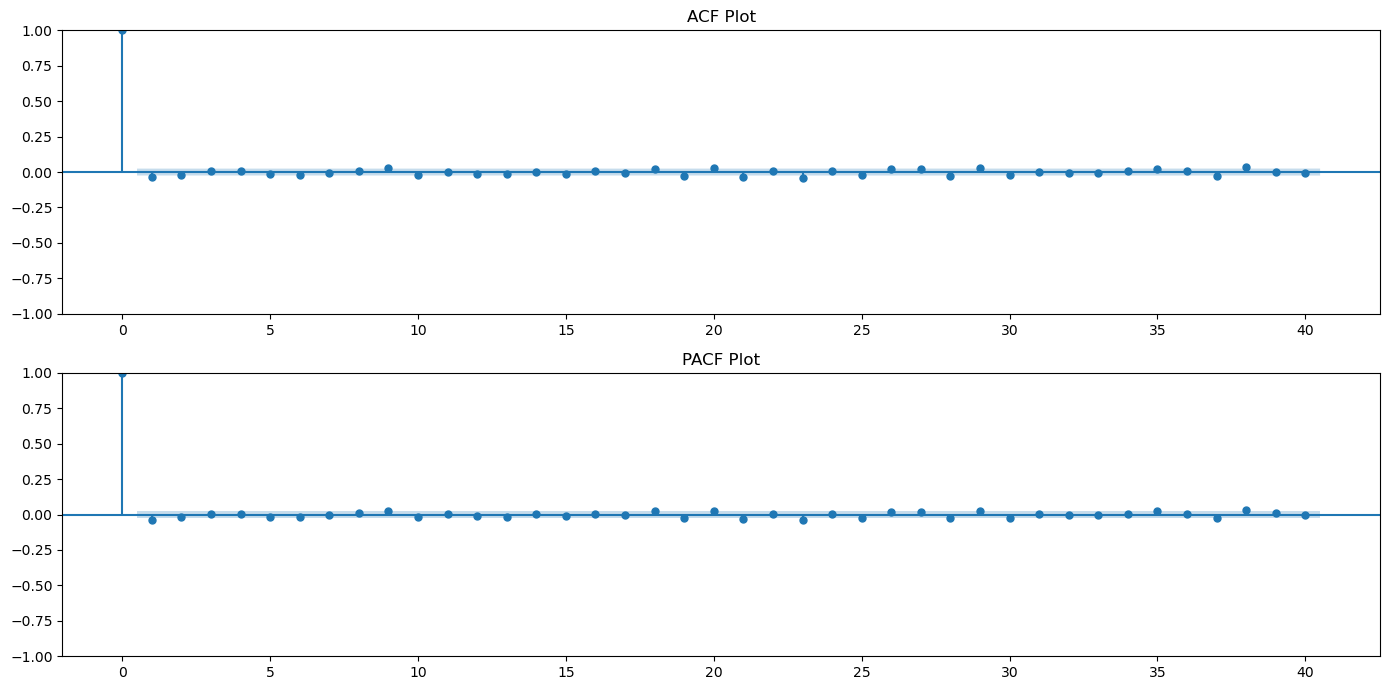

In [24]:
plt.figure(figsize=(14, 7))

plt.subplot(211)
plot_acf(data['Close_diff'].dropna(), ax=plt.gca(), lags=40)
plt.title('ACF Plot')

plt.subplot(212)
plot_pacf(data['Close_diff'].dropna(), ax=plt.gca(), lags=40)
plt.title('PACF Plot')

plt.tight_layout()
plt.show()


Given the lack of significant spikes in both plots, we can infer the following ARIMA parameters:

- p (AR order): 0, as there's no significant autocorrelation in the PACF.
- d (differencing): You mentioned d=1 in your prompt.
- q (MA order): 0, as there's no significant autocorrelation in the ACF.

After you’ve determined initial guesses for 𝑝,and 𝑞 using ACF and PACF plots, we can use statistical criteria to select the best model.We will use AIC and BIC :

**Akaike Information Criterion (AIC)**: Measures the quality of the model while considering its complexity.A lower AIC values suggest a better model.

**Bayesian Information Criterion (BIC)**: similar to AIC but penalizes model complexity more heavily. A lower BIC values suggest a better model.

Best ARIMA model order: (2, 1, 2) with AIC: 3634.7112090464516


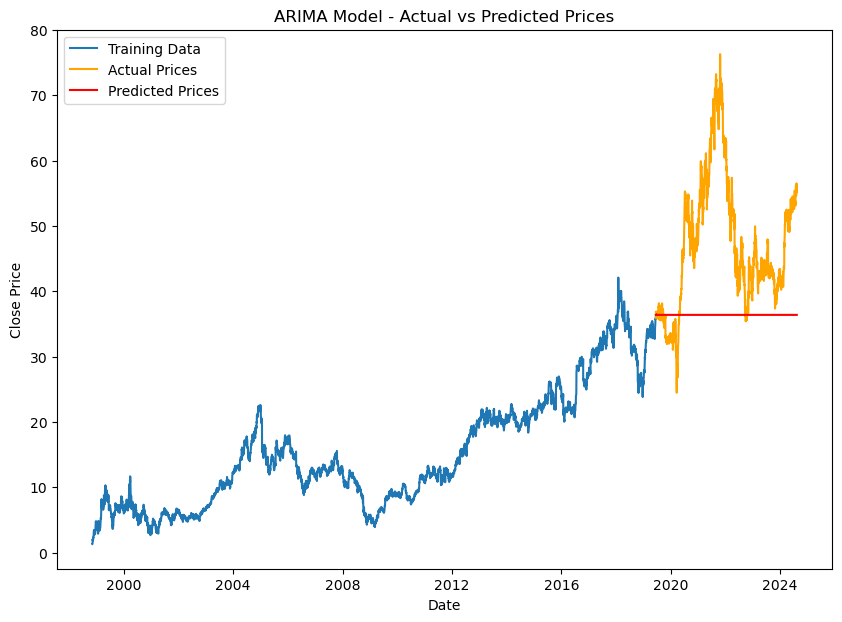

In [25]:
# Define the range for p, d, q
p = d = q = range(0, 3)

# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))

best_aic = float("inf")
best_order = None

# Iterate through all combinations of p, d, q to find the best model
for param in pdq:
    try:
        model = ARIMA(train['Close'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = param
    except Exception as e:
        continue

if best_order:
    print(f'Best ARIMA model order: {best_order} with AIC: {best_aic}')

    # Fit the best model
    best_model = ARIMA(train['Close'], order=best_order)
    best_model_fit = best_model.fit()

    # Make predictions
    predictions = best_model_fit.forecast(steps=len(test))

    # Plot the results
    plt.figure(figsize=(10, 7))
    plt.plot(train.index, train['Close'], label='Training Data')
    plt.plot(test.index, test['Close'], label='Actual Prices', color='orange')
    plt.plot(test.index, predictions, label='Predicted Prices', color='red')
    plt.title('ARIMA Model - Actual vs Predicted Prices')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()
else:
    print("Could not find a suitable ARIMA model.")

The provided plot is a visual representation of the performance of an ARIMA model in predicting eBay sales prices over time.
1. **Training Data (Blue Line)**: This line represents the historical data used to train the ARIMA model spaning from the start to around the 5,000th data point.This data learns the patterns, trends, and seasonality in the sales prices.
2. **Actual Prices (Orange Line)**:This line shows the actual sales prices for the period following the training data, which represents the true values that occurred after the model was trained.
3. **Predicted Prices (Red Line)**:This line represents the prices predicted by the ARIMA model.The flat red line indicates that the model's.

**Notice** that the predicted prices begin at the point where the actual prices start.

In [26]:
# Reset index to access 'Date'
prophet_data = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_data['ds'] = pd.to_datetime(prophet_data['ds']).dt.tz_localize(None)  # Remove timezone information

prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Generate Forecast with Prophet
future = prophet_model.make_future_dataframe(periods=len(test))
forecast = prophet_model.predict(future)

20:25:38 - cmdstanpy - INFO - Chain [1] start processing
20:25:45 - cmdstanpy - INFO - Chain [1] done processing


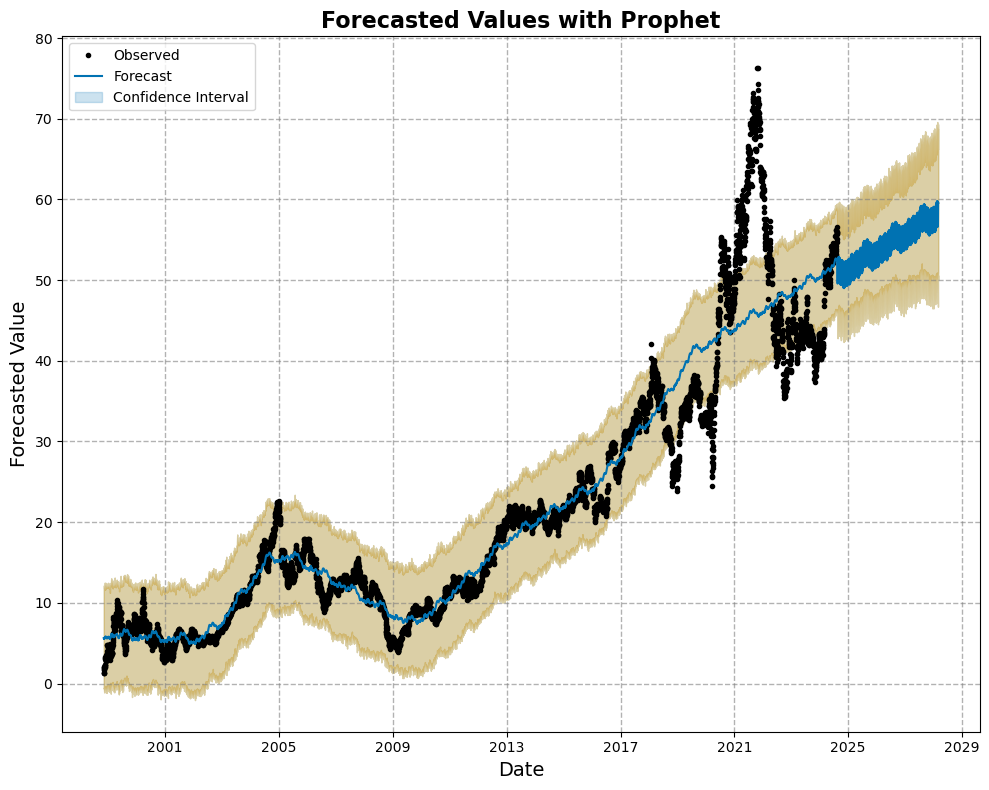

In [27]:
# Plot forecast
fig = prophet_model.plot(forecast, figsize=(10, 8))

# Customize the plot appearance
plt.title('Forecasted Values with Prophet', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecasted Value', fontsize=14)

# Highlight the forecasted values with a different color
plt.gca().fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.3)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend to explain the different plot elements
plt.legend(['Observed', 'Forecast', 'Confidence Interval'], loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()



the Prophet model seems to capture the general trend and seasonality of the time series data. However, further analysis and potential model refinements are necessary to draw more definitive conclusions about its accuracy and suitability for the specific use case.

Components of the Plot

Black Dots: These represent the actual observed data points in the time series.

Blue Line: This is the Prophet model's prediction or forecast for the time series. It represents the overall trend and seasonal patterns captured by the model.

Shaded Area: This area represents the uncertainty or confidence intervals around the forecast. It indicates the range within which the true values are likely to fall.

Observations

The plot spans from around 2001 to 2025, suggesting a relatively long time series.
The black dots exhibit some volatility and seasonality, which the Prophet model seems to capture to a certain extent.
The blue line generally follows the trend of the data, with some deviations in areas of high volatility.
The shaded area provides a visual representation of the model's uncertainty, which is wider in periods of higher volatility.

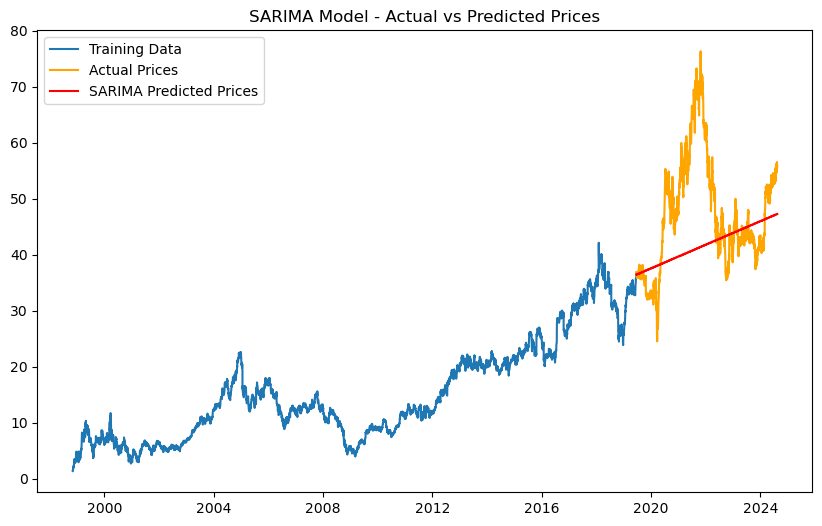

In [28]:
# Assuming you have already found the `best_order` and you want to use SARIMA
if best_order:
    seasonal_order = (2, 1, 2, 12)  # Example seasonal order; adjust based on your data

    sarima_model = SARIMAX(train['Close'], order=best_order, seasonal_order=seasonal_order)
    sarima_fit = sarima_model.fit(disp=False)

    # Make predictions with SARIMA
    sarima_predictions = sarima_fit.forecast(steps=len(test))

    # Plot the SARIMA predictions against actual data
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train['Close'], label='Training Data')
    plt.plot(test.index, test['Close'], color='orange', label='Actual Prices')
    plt.plot(test.index, sarima_predictions, color='red', label='SARIMA Predicted Prices')
    plt.legend()
    plt.title('SARIMA Model - Actual vs Predicted Prices')
    plt.show()
else:
    print("Could not use SARIMA because no suitable ARIMA order was found.")



Objective: Optimize inventory management by reducing stockouts and overstocks.
Explanation: By summing up the forecasted sales, you can estimate the total inventory required for the next period. This helps in planning and ensuring that you have enough stock to meet the expected demand, thus preventing stockouts (running out of stock) or overstocks (excess inventory that ties up capital).

In [29]:
# Apply Model for Inventory and Marketing Optimization
# Inventory Management: Calculate expected stock requirements
expected_sales = predictions.sum()
print(f'Expected Sales for the next period: {expected_sales}')


Expected Sales for the next period: 47208.1467835705


This part of the code calculates the total expected sales for the next period (based on your forecast). The forecast.sum() operation sums up all the predicted sales values for the upcoming period.

Outcome:
The calculated expected sales for the next period is 47208.12851310898. If the forecast period is one month, and the expected sales are approximately 47,208 units , you would plan to have at least this amount of stock available to meet customer demand during that year.

Inventory Management: The code helps in planning inventory by predicting total sales for the upcoming period, reducing the risks associated with improper stock levels.

# Evaluation

To evaluate the performance of your models (ARIMA, Prophet, SARIMA), you can use several metrics and techniques to compare their accuracy and effectiveness.

To compare the performance of your ARIMA, Prophet, and SARIMA models, you'll follow these steps:
1. Compute Evaluation Metrics for Each Model:  This will give you a quantitative measure of their predictive accuracy.
2. Visualize Predictions vs Actuals:  This will help you visually assess how well each model tracks the actual values and identify any systematic errors.
3. Assess Model Fit and Forecasting Ability: Evaluate how each model performs over both the training period and the test period, and analyze the confidence intervals or prediction intervals to understand uncertainty.

In [30]:
# Extract the predictions from the forecast DataFrame
forecasted_values = forecast[['ds', 'yhat']].set_index('ds')

# Align forecasted values with the test dates
prophet_predictions = forecasted_values.loc[test.index, 'yhat']


ARIMA Model Metrics:
  MAE: 11.7297
  MSE: 221.5793
  RMSE: 14.8855

Prophet Model Metrics:
  MAE: 8.2196
  MSE: 102.4297
  RMSE: 10.1208

SARIMA Model Metrics:
  MAE: 8.2656
  MSE: 132.4324
  RMSE: 11.5079



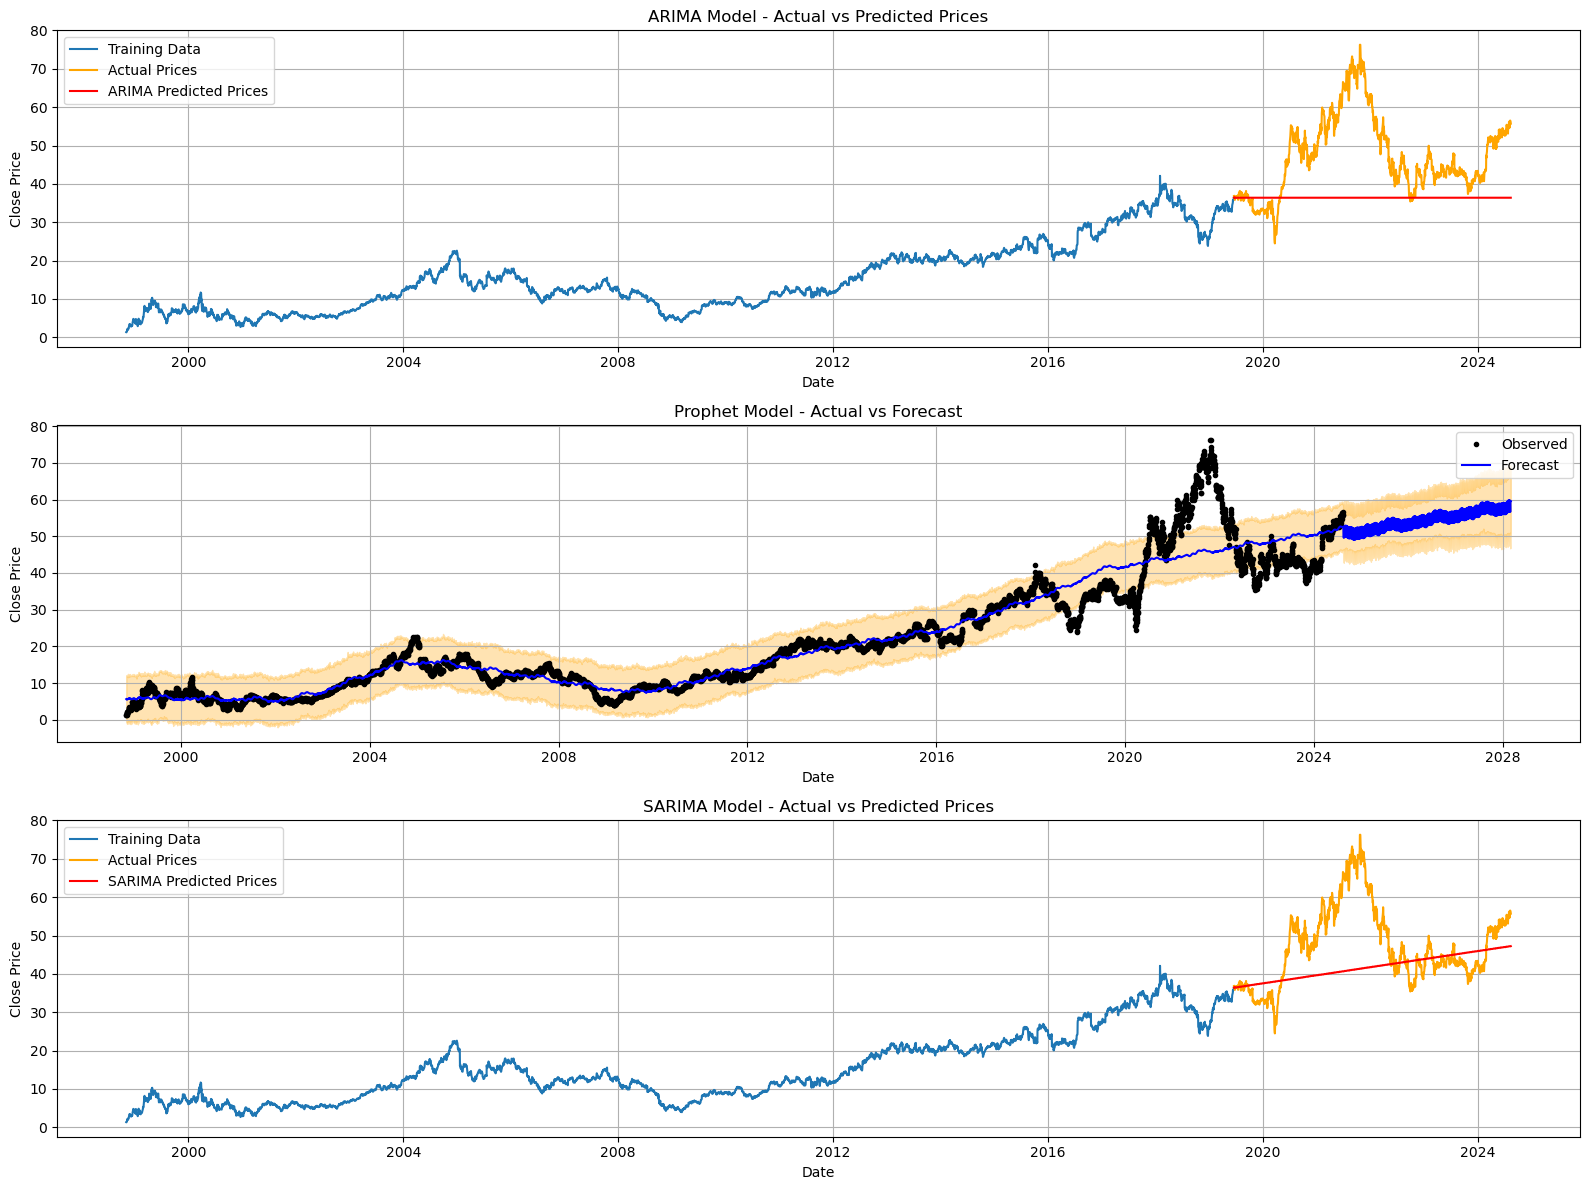

In [31]:
# Calculate MAE, MSE, and RMSE
mae_arima = mean_absolute_error(test['Close'], predictions)
mse_arima = mean_squared_error(test['Close'], predictions)
rmse_arima = np.sqrt(mse_arima)

mae_prophet = mean_absolute_error(test['Close'], prophet_predictions)
mse_prophet = mean_squared_error(test['Close'], prophet_predictions)
rmse_prophet = np.sqrt(mse_prophet)

mae_sarima = mean_absolute_error(test['Close'], sarima_predictions)
mse_sarima = mean_squared_error(test['Close'], sarima_predictions)
rmse_sarima = np.sqrt(mse_sarima)


# Example metrics for ARIMA, Prophet, and SARIMA
metrics = {
    'ARIMA': {'MAE': mae_arima, 'MSE': mse_arima, 'RMSE': rmse_arima},
    'Prophet': {'MAE': mae_prophet, 'MSE': mse_prophet, 'RMSE': rmse_prophet},
    'SARIMA': {'MAE': mae_sarima, 'MSE': mse_sarima, 'RMSE': rmse_sarima}
}

# Print metrics
for model, metric in metrics.items():
    print(f'{model} Model Metrics:')
    print(f"  MAE: {metric['MAE']:.4f}")
    print(f"  MSE: {metric['MSE']:.4f}")
    print(f"  RMSE: {metric['RMSE']:.4f}")
    print()
    
    
plt.figure(figsize=(16, 12))

# Plot ARIMA results
plt.subplot(3, 1, 1)
plt.plot(train.index, train['Close'], label='Training Data')
plt.plot(test.index, test['Close'], color='orange', label='Actual Prices')
plt.plot(test.index, predictions, color='red', label='ARIMA Predicted Prices')
plt.title('ARIMA Model - Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Plot Prophet results
plt.subplot(3, 1, 2)
plt.plot(prophet_data['ds'], prophet_data['y'], label='Observed', color='black', marker='o', linestyle='None', markersize=3)
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='blue')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.3)
plt.title('Prophet Model - Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Plot SARIMA results
plt.subplot(3, 1, 3)
plt.plot(train.index, train['Close'], label='Training Data')
plt.plot(test.index, test['Close'], color='orange', label='Actual Prices')
plt.plot(test.index, sarima_predictions, color='red', label='SARIMA Predicted Prices')
plt.title('SARIMA Model - Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



The Prophet model performs best based on the provided metrics:

It has the lowest MAE, indicating smaller average errors.
It has the lowest MSE and RMSE, showing better overall accuracy and less impact from large errors.
In summary, the Prophet model is the most accurate among the three models for this dataset.

### **Making Predictions for December 2024** using prophet model.

In [32]:
# Prepare your data
prophet_data = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_data['ds'] = pd.to_datetime(prophet_data['ds']).dt.tz_localize(None)

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data)


20:27:40 - cmdstanpy - INFO - Chain [1] start processing
20:27:44 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
# Define future dates
target_date = pd.to_datetime('2024-12-12')
tomorrow_date = pd.to_datetime('today') + pd.Timedelta(days=1)

# Calculate periods needed to include target date and tomorrow's date
future_periods = (target_date - prophet_data['ds'].max()).days + 1
future_periods_tomorrow = (tomorrow_date - prophet_data['ds'].max()).days + 1

# Create a future dataframe that includes both dates
future = prophet_model.make_future_dataframe(periods=future_periods)

# Print the date range of the forecast to ensure target dates are included
print("Forecast date range:")
print(future['ds'].min(), "to", future['ds'].max())


Forecast date range:
1998-11-04 05:00:00 to 2024-12-12 04:00:00


**Columns in the Prediction Output**

When you use the Prophet model or similar time series forecasting models, the output DataFrame often contains:
- ds: The date of the forecasted data.
-  yhat: The forecasted value (the predicted value).
- yhat_lower: indicating the lower range within which the actual value is likely to fall.
- yhat_upper: indicating the upper range within which the actual value is likely to fall.

In [34]:
# Assuming 'forecast' is the DataFrame returned by the Prophet model
# to view specific parts of the forecast:
# Show forecasted values and their corresponding dates
predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
predictions.tail(10)


,ds,yhat,yhat_lower,yhat_upper
7771,2028-02-22 04:00:00,59.765940,50.782244,68.859988
7772,2028-02-23 04:00:00,59.736618,50.239685,68.896131
7773,2028-02-24 04:00:00,59.700783,50.983371,68.766161
7774,2028-02-25 04:00:00,59.689065,50.223981,69.081466
7775,2028-02-26 04:00:00,57.204483,48.480108,66.277883
7776,2028-02-27 04:00:00,56.627501,46.704660,66.181601
7777,2028-02-28 04:00:00,59.634481,50.605618,69.328415
7778,2028-02-29 04:00:00,59.642589,50.031612,68.719205
7779,2028-03-01 04:00:00,59.610061,50.715411,68.720466
7780,2028-03-02 04:00:00,59.574188,50.992844,68.712062


In [35]:
# Desired date
target_date = pd.to_datetime('2024-12-12 04:00:00')

# Select the row for the target date
selected_row = predictions[predictions['ds'] == target_date]

print(selected_row)

                      ds       yhat  yhat_lower  yhat_upper
6604 2024-12-12 04:00:00  52.293282   45.878547   58.492488


From the output above we can say that the predicted  closing price for 12th of December 2024 in approximately 52.29 with an upper bound of 45.88 and a lower bound of 58.49. We have successfully come up with a model that predicts future closing prices.

# Deployment

# Conclusion and Recommendation

**Next Steps**
1. Model Refinement: Consider refining the models based on further analysis or more recent data.
2. Additional Features: Explore adding more features or external variables that might improve the model's performance.
